In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler



In [2]:
multiplec = pd.read_csv('multipleChoiceResponses.csv')


/Users/rasputin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
mkeys=multiplec.keys()
#excludes the columns corresponding to text explaining
multiplec=multiplec.drop([ mkeys[2], mkeys[8], mkeys[10],mkeys[23], mkeys[24], mkeys[25],mkeys[26], mkeys[44], mkeys[56], mkeys[64], mkeys[83], mkeys[85], 
                       mkeys[87], mkeys[107], mkeys[109], mkeys[123],mkeys[125], mkeys[150], 
                          mkeys[194], mkeys[223], mkeys[249],mkeys[262], mkeys[264],mkeys[276],
                      mkeys[304],mkeys[306], mkeys[329], mkeys[341], mkeys[371], mkeys[385], mkeys[394],mkeys[283]],axis=1)
multiplec.keys()

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7', 'Q8', 'Q9',
       ...
       'Q49_Part_11', 'Q49_Part_12', 'Q50_Part_1', 'Q50_Part_2', 'Q50_Part_3',
       'Q50_Part_4', 'Q50_Part_5', 'Q50_Part_6', 'Q50_Part_7', 'Q50_Part_8'],
      dtype='object', length=363)

In [28]:
multi2=multiplec.iloc[1:,:]
mkeys[283]


'Q34_OTHER_TEXT'

In [10]:
#since the first column is actually composed of integers, we do not include it in the encoding
obj_df = multi2.select_dtypes(include=['object']).copy()
obj_df = obj_df.drop(mkeys[0],axis=1)

In [11]:
#One-Hot encodes the object columns in order to 
obj_df=pd.get_dummies(obj_df)


In [12]:
x = multi2.iloc[:,0].values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
df_scaled = pd.DataFrame(x_scaled,columns=['Time from Start to Finish (seconds)'])


In [13]:
encoded_data = pd.concat([df_scaled,obj_df,multi2.select_dtypes(exclude=['object']).copy()],axis=1)
encoded_data.head()

,Time from Start to Finish (seconds),Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,...,Q49_Part_11_None/I do not make my work easy for others to reproduce,Q49_Part_12_Other,Q50_Part_1_Too expensive,Q50_Part_2_Too time-consuming,Q50_Part_3_Requires too much technical knowledge,Q50_Part_4_Afraid that others will use my work without giving proper credit,Q50_Part_5_Not enough incentives to share my work,Q50_Part_6_I had never considered making my work easier for others to reproduce,Q50_Part_7_None of these reasons apply to me,Q50_Part_8_Other
0,0.000784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000472,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000793,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000683,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000807,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [14]:
#changes nan values two -1
encoded_data = encoded_data.fillna(value=-1)
enc_keys=encoded_data.keys()

First eigen-vector var fraction: 0.4367396514172578  second var 0.10323827284119728


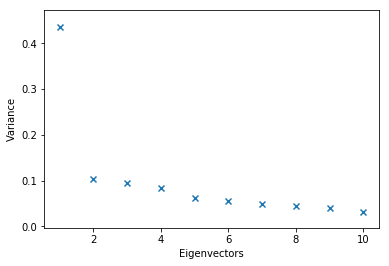

In [15]:
#pca to reduce dimentionality
pca = PCA(n_components=10)
pca.fit(encoded_data)
var=pca.explained_variance_
n_com=np.linspace(1,10,10)
plt.scatter(n_com,var/np.sum(var),marker='x')
plt.xlabel('Eigenvectors')
plt.ylabel('Variance')
print('First eigen-vector var fraction:', var[0]/np.sum(var), ' second var', var[1]/np.sum(var))
data_proj= pca.transform(encoded_data)

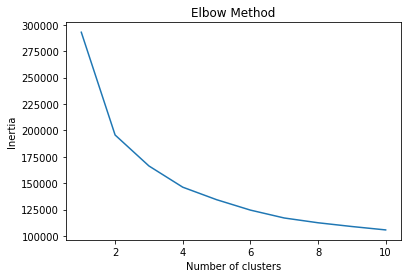

In [16]:
#kmeans
inert = []
#elbow method
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10)
    kmeans.fit(data_proj)
    inert.append(kmeans.inertia_)
plt.plot(range(1,11),inert)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Text(0.5,1,'Clusters')

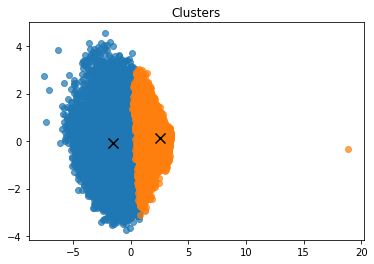

In [17]:
#looking at the 2 cluster case
n_c=2
kmeans_pca = KMeans(n_clusters=n_c,init='k-means++',max_iter=500,n_init=10,random_state=0) 
clus_index = kmeans_pca.fit_predict(data_proj) #indices para cada cluster

for i in range(0,n_c):
    plt.scatter(np.asarray(data_proj)[clus_index == i, 0], np.asarray(data_proj)[clus_index == i,1], alpha=0.7)

plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1],marker='x',s=100,c='black')

plt.title('Clusters')


In [18]:
#now, there are two types of questions: one possible answers which have one corresponding column
#and "choose all the options that apply" types of questions, which are representes by more than one column
#Keys for those questions with many cols
#manyk=np.concatenate((mkeys[14:21],mkeys[29:43],mkeys[45:55],mkeys[57:63],mkeys[65:82],mkeys[88:106],mkeys[110:122]
#                     ,mkeys[130:149],mkeys[45:55],mkeys[151:193],mkeys[196:22], mkeys[224:248],
#                     mkeys[250:261],mkeys[265:275],mkeys[277:289],mkeys[291:303], mkeys[307:328],
#                     mkeys[336:340],mkeys[343:354],mkeys[356:370],mkeys[373:384],mkeys[386:393]),axis=0)

In [19]:
#In order to find the relevant features for each cluster we are going to use a SVM with linear kernel
# we are going to find the probability of everyone belonging to each of the clusters

def get_feat(cl_num,cl_index):
    print(1)
    labels=np.zeros(len(cl_index))
#gets positions of the zero cluster members
    ii=np.where(cl_index==cl_num)
    labels[ii]=1
    labels=pd.DataFrame(labels)
    supp = SVC(kernel='linear')
    supp.fit(encoded_data,np.ravel(labels))
    print(2)
    coef=(abs(supp.coef_.ravel()))
#The coefficients returned correspond to the features, thus the largest coeficients 
#show the most important features. We can take a look at the first 20 coeficients
    top_coef= np.argsort(coef)[-20:]
    feature_names=encoded_data.keys()[top_coef]
    plt.barh(range(len(feature_names)), coef[top_coef], align='center')
    plt.yticks(range(len(feature_names)), feature_names)
    print('The most relevant feature is: ', encoded_data.keys()[top_coef][-1])

1
2
The most relevant feature is:  Q34_OTHER_TEXT_-1


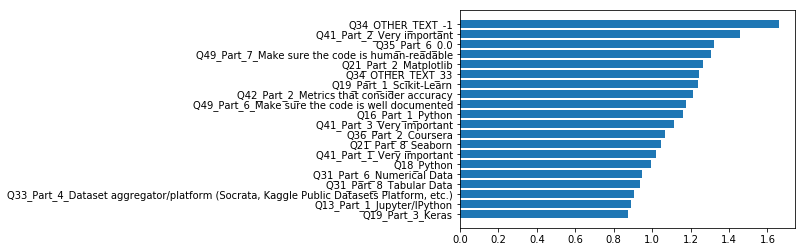

In [20]:
get_feat(1,clus_index)

In [24]:
#Given that time taken is the most important feature
clus0=np.asarray(multi2)[clus_index == 0,:]
clus1=np.asarray(multi2)[clus_index == 1,:]
print('Max time of cluster zero:', np.max(clus0[:,0].astype(float)))
print('Min time of cluster zero:', np.min(np.asarray(clus0[:,0].astype(float))))

print('Max time of cluster one:', np.max(np.asarray(clus1[:,0].astype(float))))
print('Min time of cluster one:', np.min(np.asarray(clus1[:,0].astype(float))))

#Then this implies that cluster one corresponds to the people that took a long time to finish the survey
#while the fast ones belong in cluster zero, not a very interesting feature so lets take a look at
#a 3 cluster case

IndexError: boolean index did not match indexed array along dimension 0; dimension is 23859 but corresponding boolean dimension is 23860

The most relevant feature is:  Time from Start to Finish (seconds)


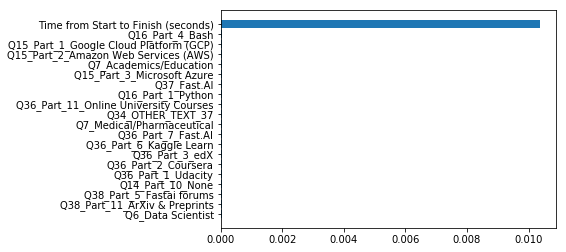

,Q34_OTHER_TEXT_-1,Q34_OTHER_TEXT_-1
0,-1.0,-1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,1.0


In [ ]:
#scale the data 